In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>DATA COLLECTION</h3>

The data set used here is from: https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict.csv
<br>
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are : <br>
GRE Scores ( out of 340 ) <br>
TOEFL Scores ( out of 120 ) <br>
University Rating ( out of 5 ) <br>
Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) <br>
Undergraduate GPA ( out of 10 ) <br>
Research Experience ( either 0 or 1 ) <br>
Chance of Admit ( ranging from 0 to 1 ) <br>

In [2]:
df = pd.read_csv("Admission_Predict.csv")

<h3>EXPLORATORY DATA ANALYSIS</h3>

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


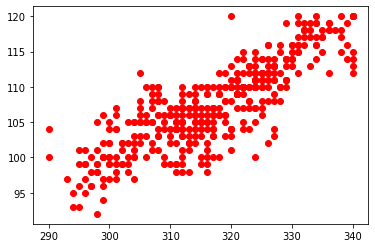

In [5]:
# Check if any linear relation between GRE Score and TOEFL Score
import matplotlib.pyplot as plt
plt.scatter(df['GRE Score'], df['TOEFL Score'], color='red')
plt.show()
# plot will show except few outliers, in general student with high GRE score will have higher TOEFL score

In [6]:
df_new = df.drop(columns=['Serial No.'])

The correlation can go as high as 1 or go as low as -1.  A correlation of 0 means no (linear) relationship – They san have some relation but relation is not linear
Correlation matrix shows the relation.  The value of 1 can be see diagonally because they are the same variables

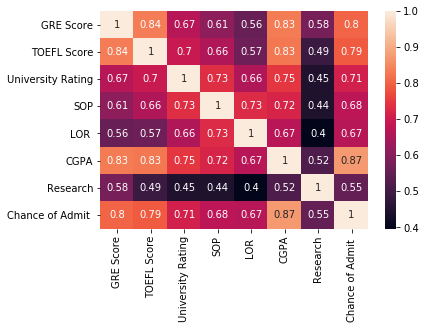

In [7]:
# coorelation matrix heatmap
import seaborn as sns
import numpy as np

# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

sns.heatmap(df_new.corr(), annot=True)

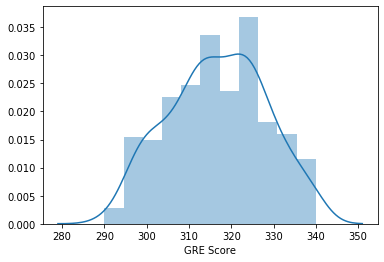

In [8]:
# Visualize data with pairs using Scatterplot matrices

# Attribute statistics
sns.distplot(df_new['GRE Score'])

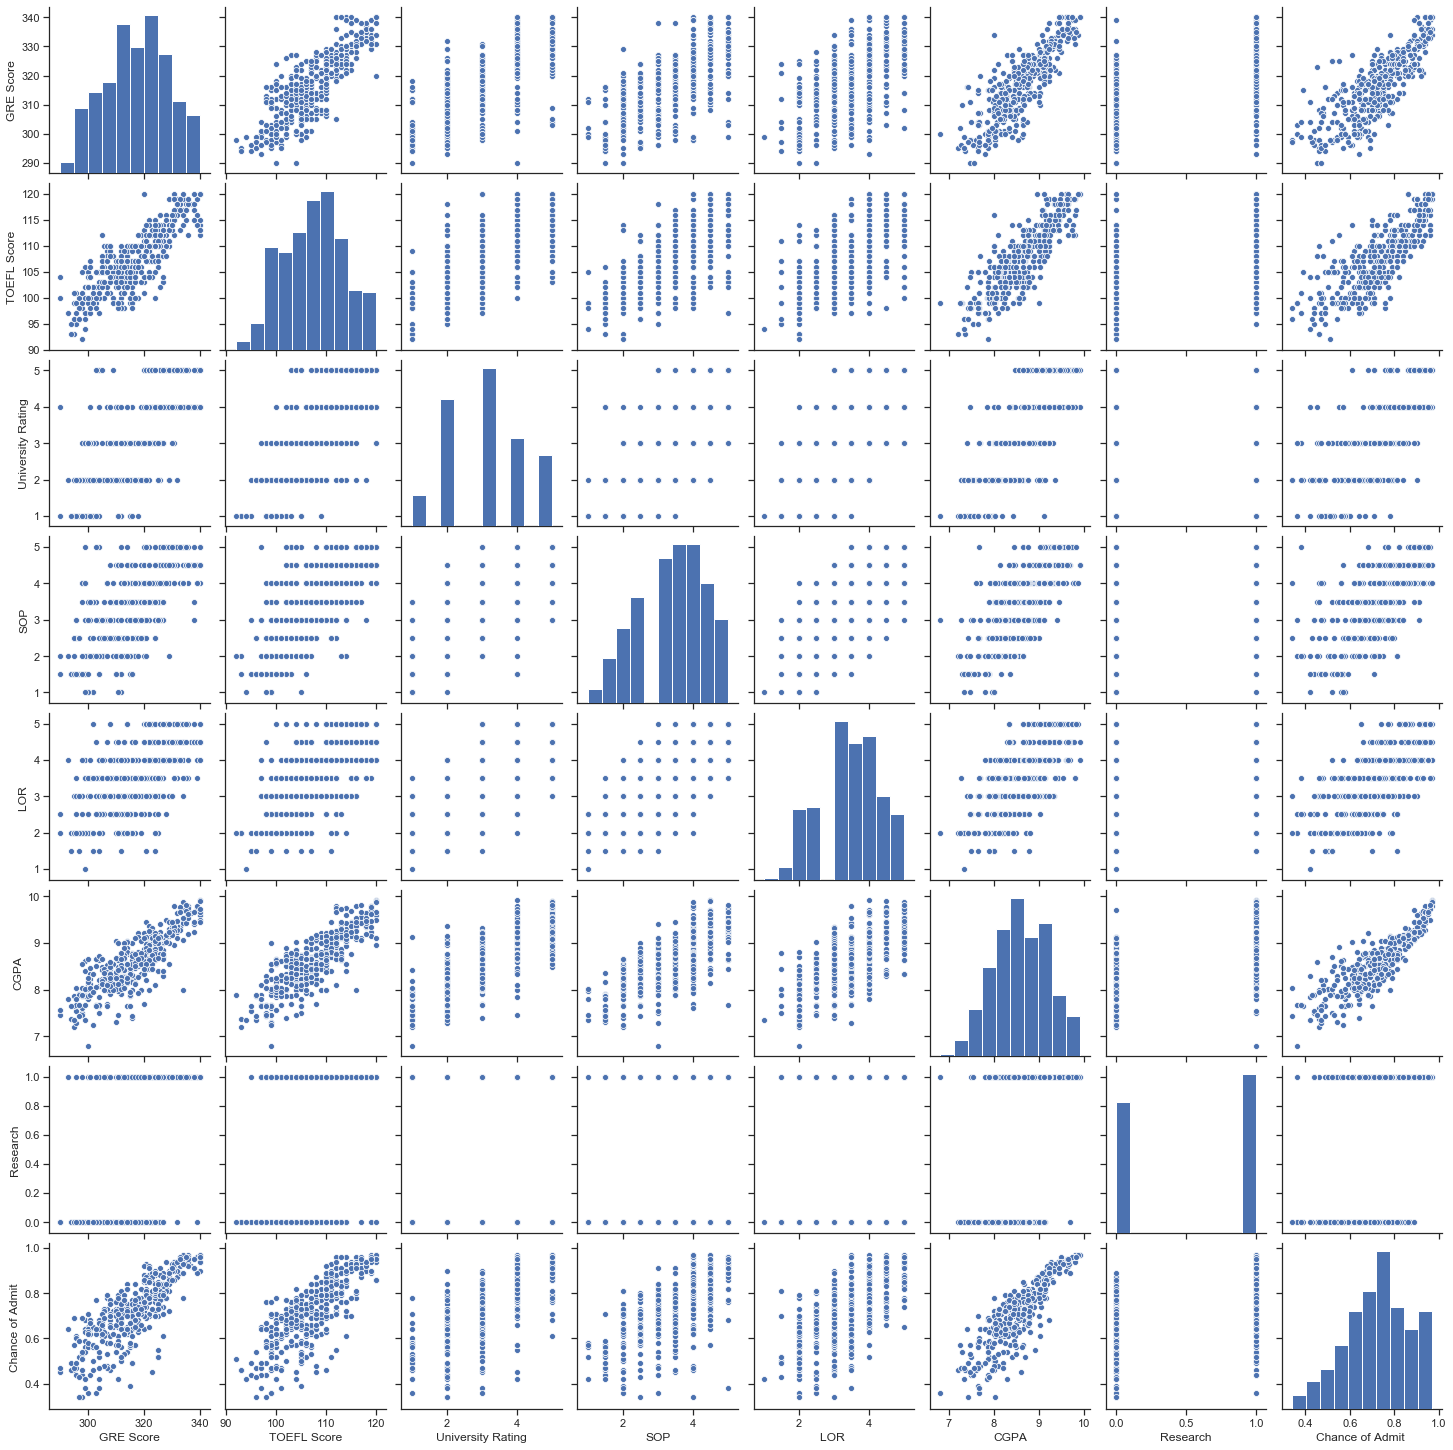

In [14]:
sns.pairplot(df_new)

<h3> DATA PREPROCESSING</h3>

We did some preprocessing in previous step by removing the S. No. column. 

In [9]:
list(df_new.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

<h3>MODEL TRAINING</h3> 
1. Algorithm selection <br>
2. Define X <br>
3. Define Y <br>
4. Model fitting 

In [10]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
from sklearn.linear_model import LinearRegression

# list(DataFrame.columns) gives list that can be directly coped here
# prepare the feature list
# choose the feature to be predicted
X = df_new[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
Y = df_new['Chance of Admit '].values

In [11]:
# Test train split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
regressor.coef_

array([ 0.00207128,  0.00195523,  0.00657193, -0.00472847,  0.02118445,
        0.12463177,  0.02414366])

In [15]:
# prediction on test data
y_pred = regressor.predict(X_test)

In [16]:
# Actual vs prediction
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

In [17]:
df1.head()

,Actual,Predicted
0,0.71,0.697913
1,0.70,0.693439
2,0.79,0.778827
3,0.73,0.615774
4,0.72,0.722820


<h3>MODEL EVALUATION</h3>

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).
MAE: The easiest to understand. Represents average error
MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular
RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model
Below, you can see how to calculate each metric. All of them require two lists as parameters, with one being your predicted values and the other being the true values
Ref - https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

In [18]:
from sklearn import metrics

print(metrics.mean_absolute_error(Y_test, y_pred))
# a value of 0 will indicates no error

0.05008754843817953


In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Squared Error: 0.004805156569785205
Root Mean Squared Error: 0.06931923665033542
